Ques1 Build a transfer learnt model from a model trained on EfficientNet by adding additional layers

In [16]:
import numpy as np
import pandas as pd
import os

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, Flatten

In [22]:
image_transformer = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.2,
    rescale=1.0/255.0
)


image_loader_training = tf.keras.preprocessing.image.DirectoryIterator(
    '/kaggle/input/faces-dcgan/dataset',
    image_transformer,
    target_size=(256, 256),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    subset='training'
)

image_loader_validation = tf.keras.preprocessing.image.DirectoryIterator(
    '/kaggle/input/faces-dcgan/dataset',
    image_transformer,
    target_size=(256, 256),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    subset='validation'
)

Found 12365 images belonging to 6 classes.
Found 3088 images belonging to 6 classes.


In [108]:
image_loader_training[0][1]

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0.

In [78]:
efnet_model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights='imagenet',
    classes=6,
)

inputs = tf.keras.Input(shape=(256, 256, 3))

image_feat = efnet_model(inputs)
flatten_layer = Flatten()(image_feat)
classification_layer_1 = Dense(512, activation="relu")(flatten_layer)
classification_layer_2 = Dense(256, activation="relu")(classification_layer_1)
classification_layer_3 = Dense(6, activation="softmax")(classification_layer_2)


model = tf.keras.Model(inputs,classification_layer_3)
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=['accuracy']
)

In [79]:
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 8, 8, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 81920)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 512)            │    41,943,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,125,993 (175.96 MB)

 Trainable params: 46,083,970 (175.80 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [80]:
his = model.fit(image_loader_training, validation_data=image_loader_validation, epochs=10)

Epoch 1/10
  1/387 ━━━━━━━━━━━━━━━━━━━━ 8:40:17 81s/step - accuracy: 0.0312 - loss: 2.6460

W0000 00:00:1712093507.522860     142 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


248/387 ━━━━━━━━━━━━━━━━━━━━ 54s 389ms/step - accuracy: 0.5273 - loss: 1.9449

W0000 00:00:1712093603.689428     142 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.5673 - loss: 1.6316

W0000 00:00:1712093640.576109     141 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


387/387 ━━━━━━━━━━━━━━━━━━━━ 236s 402ms/step - accuracy: 0.5676 - loss: 1.6299 - val_accuracy: 0.2293 - val_loss: 2.1259
Epoch 2/10


W0000 00:00:1712093662.770350     141 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


387/387 ━━━━━━━━━━━━━━━━━━━━ 90s 229ms/step - accuracy: 0.8123 - loss: 0.4929 - val_accuracy: 0.7108 - val_loss: 1.0329
Epoch 3/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 90s 228ms/step - accuracy: 0.8714 - loss: 0.3423 - val_accuracy: 0.7898 - val_loss: 0.5931
Epoch 4/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 90s 229ms/step - accuracy: 0.9019 - loss: 0.2661 - val_accuracy: 0.7613 - val_loss: 0.7488
Epoch 5/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 91s 231ms/step - accuracy: 0.9195 - loss: 0.2269 - val_accuracy: 0.7727 - val_loss: 0.7971
Epoch 6/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 91s 231ms/step - accuracy: 0.9291 - loss: 0.1897 - val_accuracy: 0.7753 - val_loss: 0.8259
Epoch 7/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 89s 228ms/step - accuracy: 0.9399 - loss: 0.1716 - val_accuracy: 0.7804 - val_loss: 0.7724
Epoch 8/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 94s 239ms/step - accuracy: 0.9473 - loss: 0.1524 - val_accuracy: 0.7710 - val_loss: 0.8911
Epoch 9/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 91s 231ms/step - accuracy: 0.9495 - loss: 0.1550 - val

## Testing

In [110]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,RocCurveDisplay, auc
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
model_predictions = model.predict(image_loader_validation)
model_predictions_max = np.argmax(model_predictions, axis=1)

97/97 ━━━━━━━━━━━━━━━━━━━━ 26s 269ms/step


In [118]:
oh_labels = OneHotEncoder(sparse=False)
true_preds = image_loader_validation.labels
preds_ohe = oh_labels.fit_transform(true_preds.reshape(-1,1))

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [83]:
print(classification_report(true_preds, model_predictions_max))

              precision    recall  f1-score   support

           0       0.06      0.07      0.07       241
           1       0.05      0.03      0.04       262
           2       0.27      0.27      0.27       748
           3       0.28      0.27      0.27       805
           4       0.26      0.36      0.30       786
           5       0.07      0.02      0.04       246

    accuracy                           0.24      3088
   macro avg       0.17      0.17      0.16      3088
weighted avg       0.22      0.24      0.22      3088



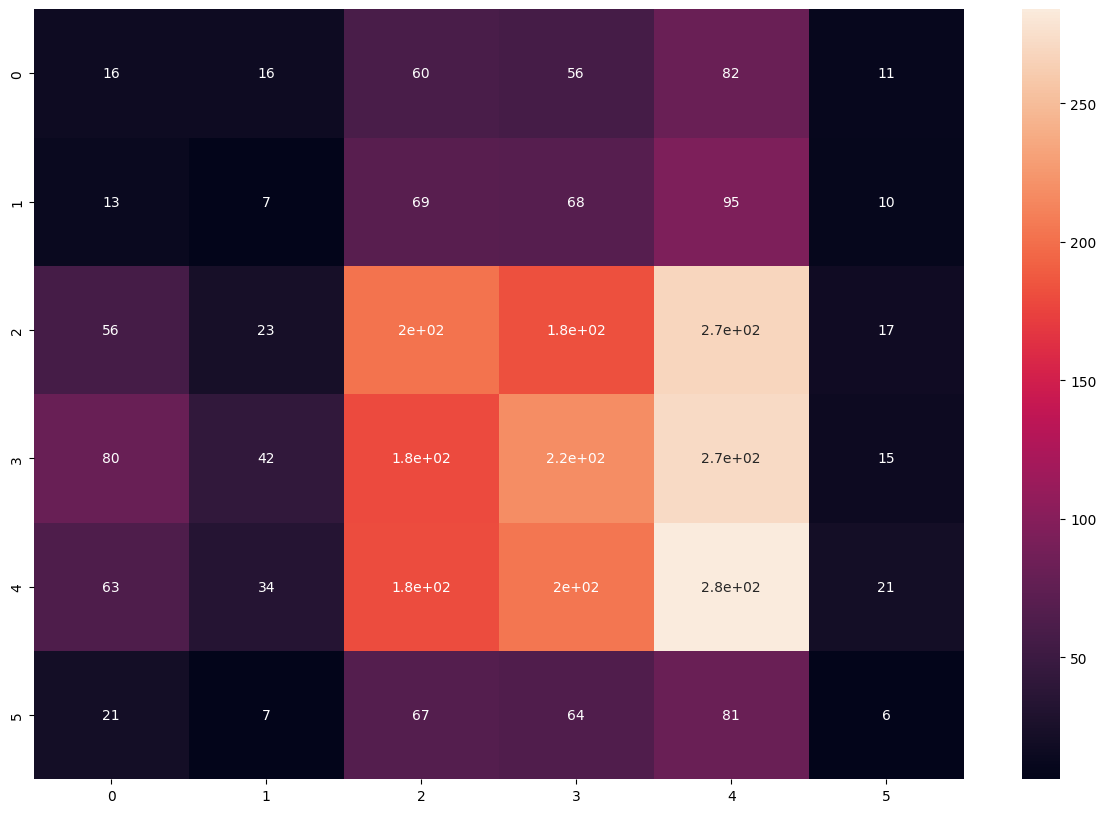

In [84]:
conf_mat = confusion_matrix(true_preds,model_predictions_max)

fig = plt.figure(figsize=(15,10))
sns.heatmap(conf_mat, annot=True)
plt.show()

In [101]:
def plot_auc_curve(model_preds, model_labels, num_classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(model_labels[:, i], model_preds[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    plt.figure()
    colors = ['blue', 'red', 'green', 'orange']
    for i, color in zip(range(num_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (class %d) (area = %0.2f)' % (i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) for Multiclass Classification')
    plt.legend(loc="lower right")
    plt.show()

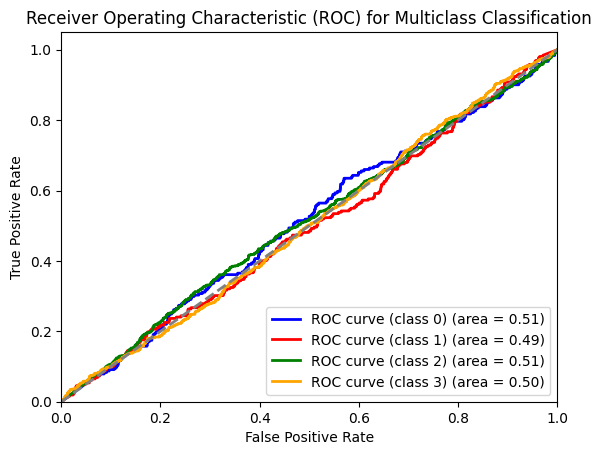

In [124]:
plot_auc_curve(model_predictions,preds_ohe, 6)